In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file
df = pd.read_csv('raw 2023/01_02_2023.csv')

# Display all columns of the dataframe without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# # Display all columns of the dataframe without truncation
# for column in df.columns:
#     print(column)

# Check for nulls in each column
null_counts = df.isnull().sum()
print(null_counts)

# Get the total number of entries
total_entries = len(df)
print(f"Total number of entries: {total_entries}")

C:\Users\nhth2\AppData\Local\Temp\ipykernel_29456\969255303.py:2: DtypeWarning: Columns (3,5,7,8,11,14,21,27,28,29,30,31,32,33,34,35,36,37,38,39,42,43,44,45,46,49,50,51,52,53,54,55,56,57,59,60,61,70,72,73,77,78,83,89,94,96,97,98,99,100,101,102,103,104,105,106,107,108,111,115,118,120,123) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('raw 2023/01_02_2023.csv')


STATION                                    0
DATE                                       0
REPORT_TYPE                                0
SOURCE                                     0
AWND                                  140615
                                       ...  
ShortDurationPrecipitationValue150    140616
ShortDurationPrecipitationValue180    140616
Sunrise                               138519
Sunset                                138519
WindEquipmentChangeDate                98183
Length: 124, dtype: int64
Total number of entries: 140665


In [3]:
# Parse the DATE property
df['DATE'] = pd.to_datetime(df['DATE'])

# Separate into date and time of day
df['DATE_ONLY'] = df['DATE'].dt.date
df['TIME_OF_DAY'] = df['DATE'].dt.time

# Display the first few rows to verify
print(df[['DATE', 'DATE_ONLY', 'TIME_OF_DAY']].head())

                 DATE   DATE_ONLY TIME_OF_DAY
0 2023-01-08 23:59:00  2023-01-08    23:59:00
1 2023-01-09 12:51:00  2023-01-09    12:51:00
2 2023-01-09 12:56:00  2023-01-09    12:56:00
3 2023-01-09 13:56:00  2023-01-09    13:56:00
4 2023-01-09 14:53:00  2023-01-09    14:53:00


In [4]:
# Calculate the threshold for 80% missing data
threshold = len(df) * 0.5

# Drop columns where the number of missing values is greater than or equal to the threshold
df_cleaned = df.dropna(thresh=threshold, axis=1)

# Display the cleaned dataframe
print(df_cleaned.head())
print(df_cleaned.columns)
print(df_cleaned.isnull().sum())

       STATION                DATE REPORT_TYPE SOURCE HourlyAltimeterSetting  \
0  72792894263 2023-01-08 23:59:00       SOD        6                    NaN   
1  72792894263 2023-01-09 12:51:00       FM-15      7                  29.45   
2  72792894263 2023-01-09 12:56:00       FM-15      7                  29.45   
3  72792894263 2023-01-09 13:56:00       FM-15      7                  29.47   
4  72792894263 2023-01-09 14:53:00       FM-15      7                  29.51   

  HourlyDewPointTemperature HourlyDryBulbTemperature HourlyRelativeHumidity  \
0                       NaN                      NaN                    NaN   
1                      46.0                     50.0                   88.0   
2                      47.0                     50.0                   89.0   
3                      46.0                     48.0                   93.0   
4                      46.0                     46.0                  100.0   

             HourlySkyConditions HourlyStati

In [5]:
# Strip leading/trailing spaces from 'REPORT_TYPE' column
df['REPORT_TYPE'] = df['REPORT_TYPE'].str.strip()

# Group the data by 'station' column
grouped_df = df.groupby('STATION')

# Display the first few rows of each group
for station, group in grouped_df:
    print(f"Station: {station}")

# Create a dictionary to store dictionaries of dataframes grouped by REPORT_TYPE
dict_grouped_station = {}
dict_grouped_station_report_type = {}
dict_grouped_station_SOD = {}
dict_grouped_station_Daily = {}
for station, group in grouped_df:
    grouped_report_type = group.groupby('REPORT_TYPE')
    dict_grouped_station[station] = group
    dict_grouped_station_report_type[station] = {report_type: data for report_type, data in grouped_report_type}

for station, group in dict_grouped_station.items():
    print("\n")
    print(f"Station: {station} - Counts: {len(group)}") 

for station, group in dict_grouped_station_report_type.items():
    print("\n")
    print(f"Station: {station}")
    for report_type, data in group.items():
        print(f"Report Type: {report_type} - Counts: {len(data)}")

for station, group in dict_grouped_station_report_type.items():
    print("\n")
    if 'SOD' in group:
        print(f"Station: {station} - Report Type: SOD - Counts: {len(group['SOD'])}") 
    else:
        print(f"Station: {station} - Report Type: SOD - Counts: 0 (No 'SOD' report type found)")


Station: 72025400119
Station: 72027294282
Station: 72038800469
Station: 72074924255
Station: 72220804224
Station: 72698824219
Station: 72781024243
Station: 72781524237
Station: 72782594239
Station: 72782724110
Station: 72784524163
Station: 72784624160
Station: 72785024157
Station: 72785524114
Station: 72785694176
Station: 72785794129
Station: 72787094119
Station: 72788324220
Station: 72788594266
Station: 72789094197
Station: 72790024141
Station: 72791894298
Station: 72792024227
Station: 72792394225
Station: 72792424223
Station: 72792594227
Station: 72792894263
Station: 72793024233
Station: 72793494248
Station: 72793724222
Station: 72793894274
Station: 72794504205
Station: 72797094240
Station: 72797624217
Station: 72798594276
Station: 74206024207
Station: 74207124201
Station: 99999904136
Station: 99999904223
Station: 99999904237


Station: 72025400119 - Counts: 4107


Station: 72027294282 - Counts: 4243


Station: 72038800469 - Counts: 1355


Station: 72074924255 - Counts: 1541


Statio

In [6]:
stations_with_sod_40_and_up = {station: group for station, group in dict_grouped_station_report_type.items() if 'SOD' in group and len(group['SOD']) >= 40}

print(f"Number of stations with 40 or more 'SOD' report type: {len(stations_with_sod_40_and_up)}")
for station, group in stations_with_sod_40_and_up.items():
    print(f"Station: {station} - Report Type: SOD - Counts: {len(group['SOD'])}")

Number of stations with 40 or more 'SOD' report type: 37
Station: 72025400119 - Report Type: SOD - Counts: 51
Station: 72074924255 - Report Type: SOD - Counts: 41
Station: 72220804224 - Report Type: SOD - Counts: 50
Station: 72698824219 - Report Type: SOD - Counts: 59
Station: 72781024243 - Report Type: SOD - Counts: 59
Station: 72781524237 - Report Type: SOD - Counts: 57
Station: 72782594239 - Report Type: SOD - Counts: 59
Station: 72782724110 - Report Type: SOD - Counts: 59
Station: 72784524163 - Report Type: SOD - Counts: 59
Station: 72784624160 - Report Type: SOD - Counts: 59
Station: 72785024157 - Report Type: SOD - Counts: 59
Station: 72785524114 - Report Type: SOD - Counts: 40
Station: 72785694176 - Report Type: SOD - Counts: 59
Station: 72785794129 - Report Type: SOD - Counts: 59
Station: 72787094119 - Report Type: SOD - Counts: 59
Station: 72788324220 - Report Type: SOD - Counts: 59
Station: 72788594266 - Report Type: SOD - Counts: 59
Station: 72789094197 - Report Type: SOD - 

In [7]:
# for station, group in stations_with_sod_40_and_up.items():
#     SOD_group = group['SOD']
#     filename = f"{station}_SOD.csv"
#     SOD_group.to_csv(filename, index=False)


In [8]:
grouped_df_report_type = df.groupby('REPORT_TYPE')
# Check for nulls in each group
dict_grouped_report_type = { report_type: data for report_type, data in grouped_df_report_type }

for report_type, data in dict_grouped_report_type.items():
	print("\n")
	print(f"Report Type: {report_type} - Counts: {len(data)}")
	pd.set_option('display.max_rows', None)
	pd.set_option('display.max_columns', None)
	print(data.isnull().sum())



Report Type: CRN05 - Counts: 50976
STATION                                             0
DATE                                                0
REPORT_TYPE                                         0
SOURCE                                              0
AWND                                            50976
BackupDirection                                 50976
BackupDistance                                  50976
BackupDistanceUnit                              50976
BackupElements                                  50976
BackupElevation                                 50976
BackupElevationUnit                             50976
BackupEquipment                                 50976
BackupLatitude                                  50976
BackupLongitude                                 50976
BackupName                                      50976
CDSD                                            50976
CLDD                                            50976
DSNW                                         

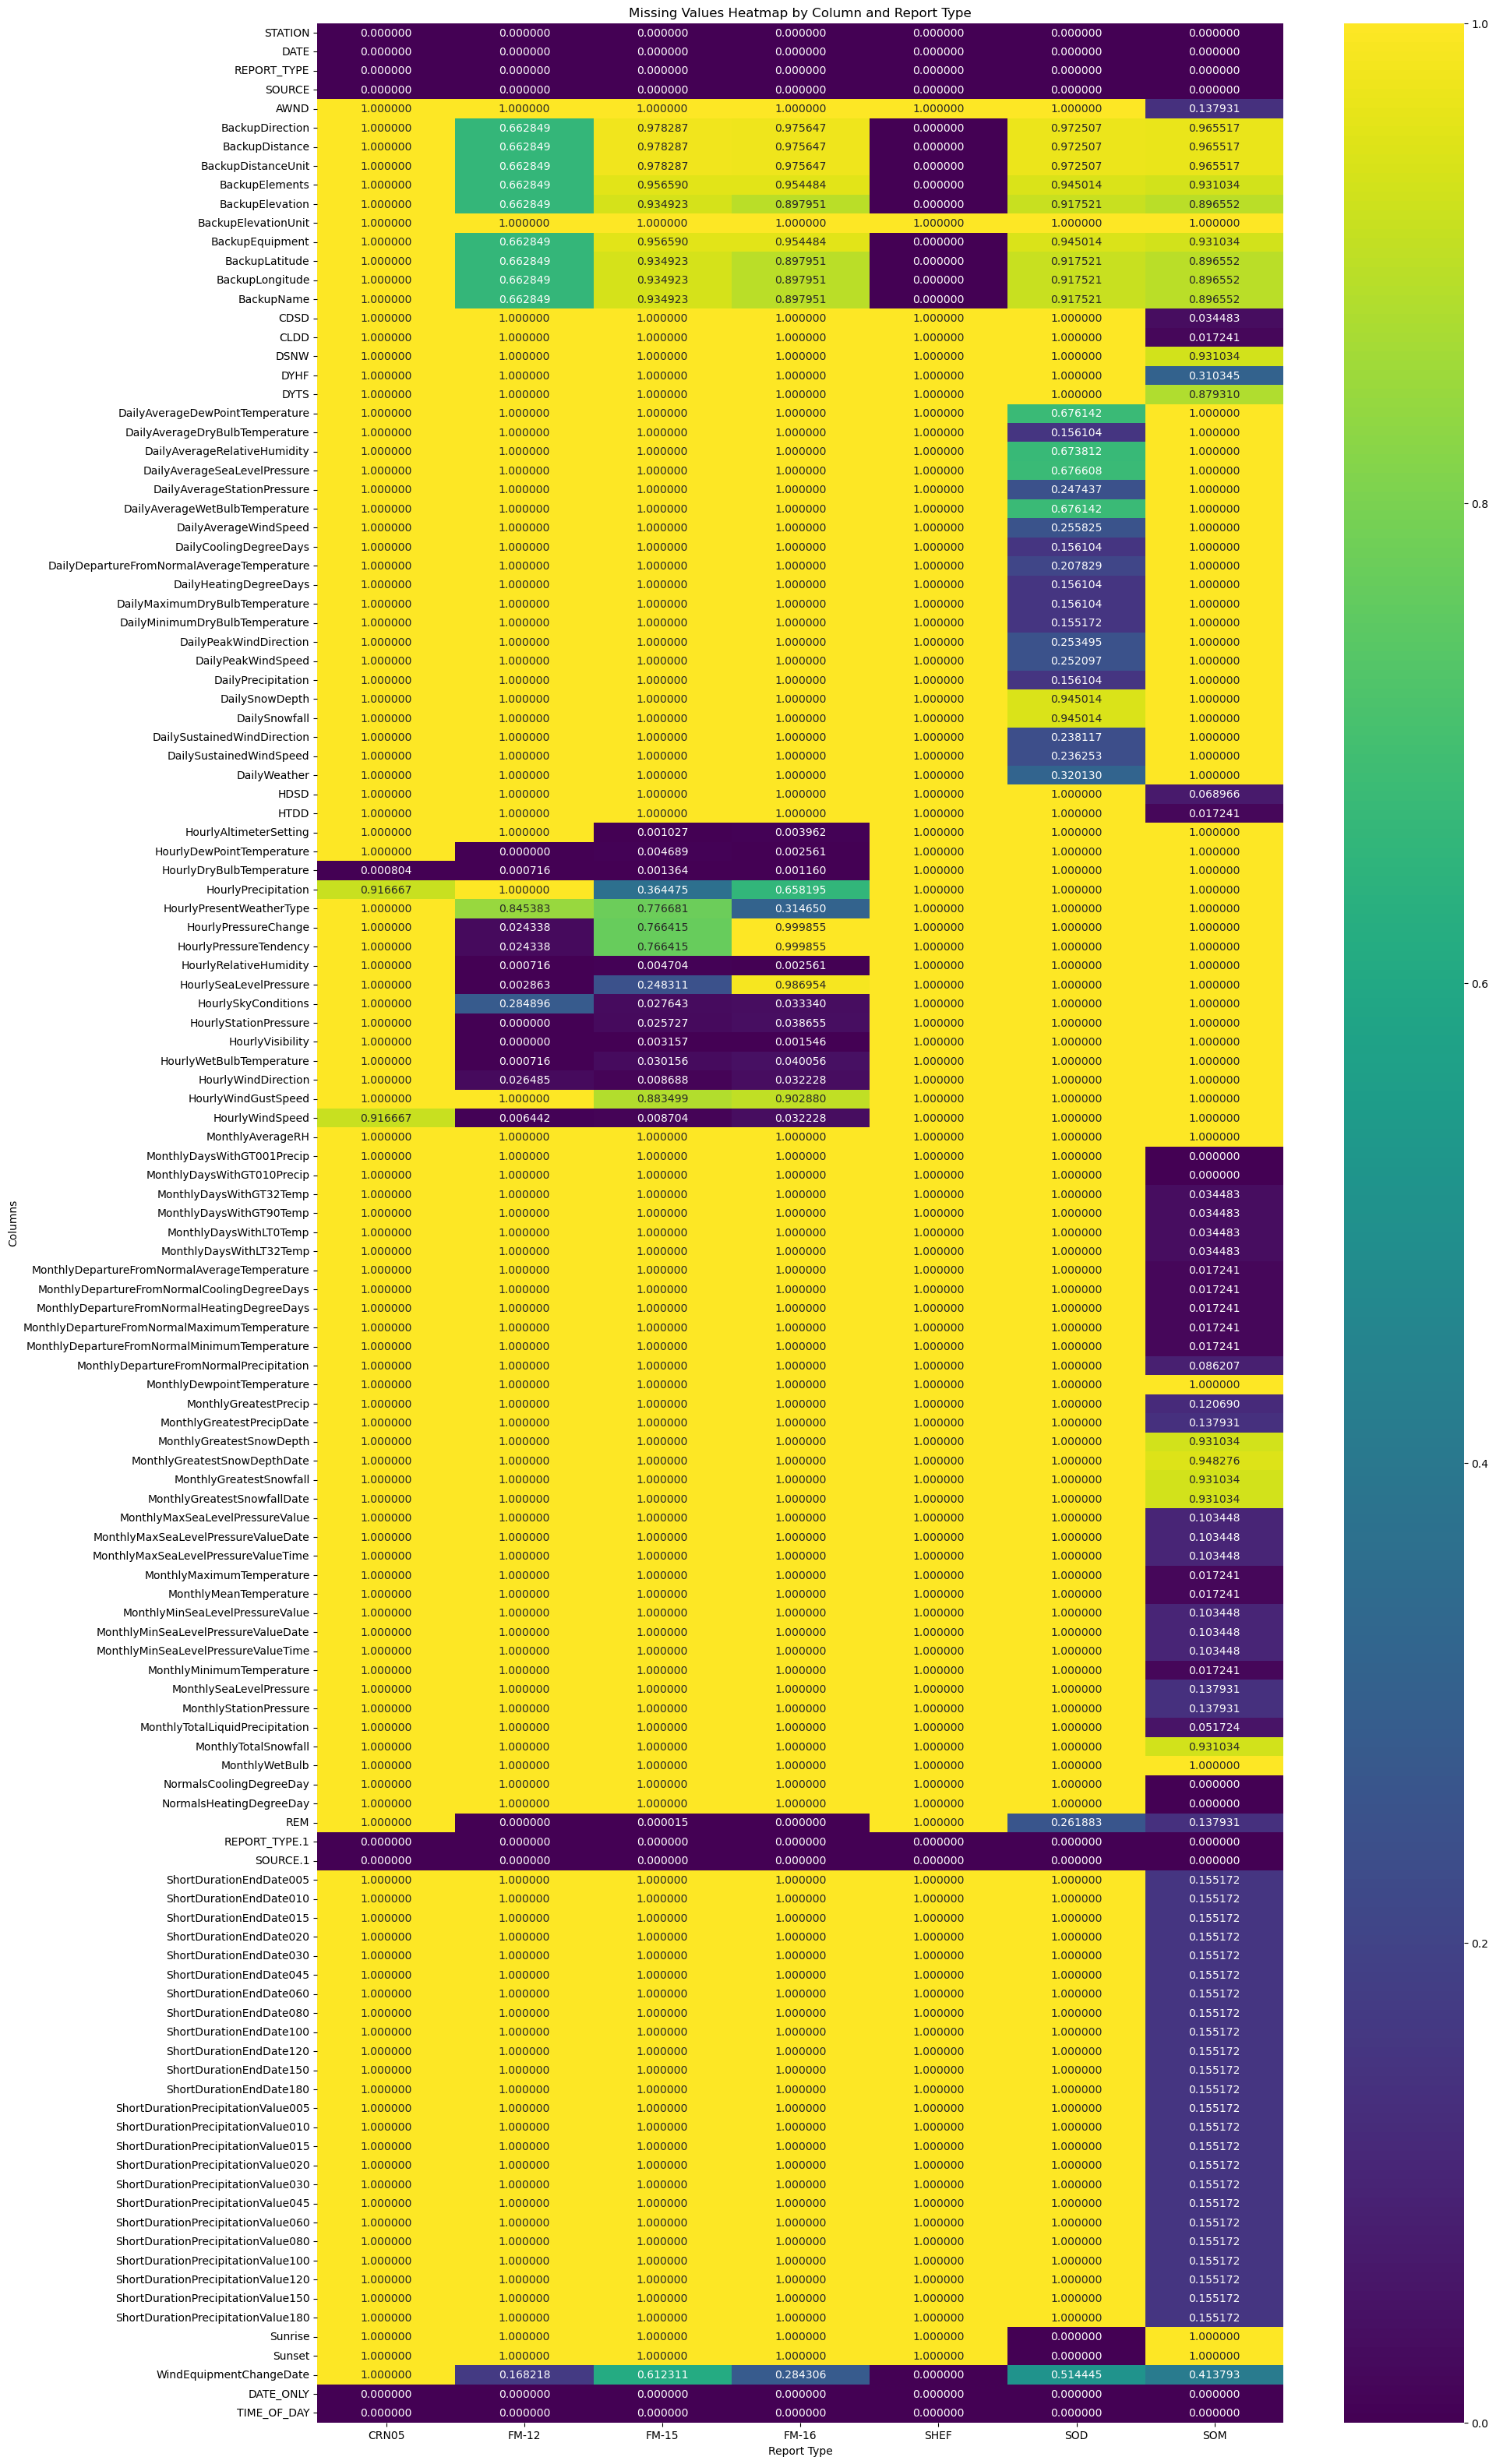

In [9]:
total_counts = df.groupby('REPORT_TYPE').size()
missing_data = df.isnull().groupby(df['REPORT_TYPE']).sum().transpose()

normalized_missing_data = missing_data.div(total_counts, axis=1)

# Plot the heatmap
plt.figure(figsize=(20, 40))
sns.heatmap(normalized_missing_data, cmap='viridis', cbar=True, annot=True, fmt='3f')
plt.title('Missing Values Heatmap by Column and Report Type')
plt.xlabel('Report Type')
plt.ylabel('Columns')
plt.savefig('missing_values_heatmap.png')

In [10]:
for station, group in dict_grouped_station.items():
    grouped_by_date = group.groupby('DATE_ONLY')
    for date, group in grouped_by_date:
        # Calculate the daily averages for each column that can be averaged
        daily_averages = grouped_by_date.mean(numeric_only=True)

        # Convert the daily averages DataFrame to a dictionary
        daily_averages_dict = daily_averages.to_dict(orient='index')

        # Store the dictionary in dict_grouped_station_Daily
        dict_grouped_station_Daily[station] = daily_averages_dict

In [11]:
for station, group in dict_grouped_station_Daily.items():
    if len(group) < 59:
        print(f"Station: {station} - Counts: {len(group)}")
        # Generate a date range from start of January 2023 to end of February 2023
        date_range = pd.date_range(start='2023-01-01', end='2023-02-28')

        # Find the missing dates
        missing_dates = [date for date in date_range if date.date() not in group]
        print(f"Missing dates for station {station}")
        for date in missing_dates:
            print(date.date())

Station: 72038800469 - Counts: 19
Missing dates for station 72038800469
2023-01-01
2023-01-02
2023-01-03
2023-01-04
2023-01-05
2023-01-06
2023-01-07
2023-01-08
2023-01-09
2023-01-10
2023-01-11
2023-01-12
2023-01-13
2023-01-14
2023-01-15
2023-01-16
2023-01-17
2023-01-18
2023-01-19
2023-01-20
2023-01-21
2023-01-22
2023-01-23
2023-01-24
2023-01-25
2023-01-26
2023-01-27
2023-01-28
2023-01-29
2023-01-30
2023-01-31
2023-02-01
2023-02-02
2023-02-03
2023-02-04
2023-02-05
2023-02-06
2023-02-07
2023-02-08
2023-02-09
Station: 72074924255 - Counts: 58
Missing dates for station 72074924255
2023-02-20
Station: 72781524237 - Counts: 58
Missing dates for station 72781524237
2023-01-16
Station: 72792894263 - Counts: 52
Missing dates for station 72792894263
2023-01-01
2023-01-02
2023-01-03
2023-01-04
2023-01-05
2023-01-06
2023-01-07
